# Computational Neurotechnology EX01


 Generate spikes for 1 s following a Poisson process with a constant rate of 100 Hz, and record
 their time of occurrence. Use discrete time bins of a width of 0.1 ms (i.e. a sampling frequency
 of 10 kHz). For each time bin, indicate the presence of a spike by a value of 1, and the absence
 of a spike by the value of 0. Use the fact that in a single short time interval of duration t, the
 probability of a spike occurrence is r t. Plot the spike train. Compute then 1,000 such spike trains
 and measure the Fano factor across the 1,000 repetitions. What do you conclude?
 
 a stochastic process not deterministic

Text(0.5, 0, 'Time [s]')

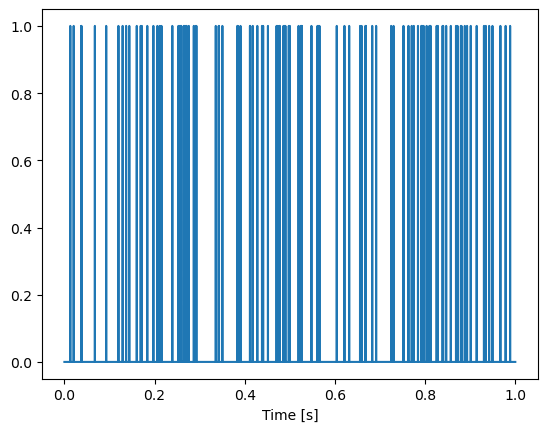

In [2]:
import numpy as np
import matplotlib.pylab as plt

# Recipe
T = 1 
F_sampling = 10 * 1000 
firing_rate = 100
t = np.arange(0,T,1/F_sampling)

# Poisson
# Firing independant, P(x) Rate does not change over time
def poisson_firing(firing_rate):
    s = np.random.uniform(size=F_sampling*T)
    p=firing_rate/F_sampling 

    s[s<=1-p]=0 
    s[s>1-p]=1 
    return s

plt.plot(t, poisson_firing(firing_rate))
plt.xlabel("Time [s]")


Definition of the Fano factor (which is approx. 1 for poisson distributions)

F=Var(n)/< n >

In [3]:
n_rep = 1000
spikes = np.zeros(n_rep)
for i in range(n_rep):
    spikes[i] = np.sum(poisson_firing(firing_rate))
print(np.var(spikes)/np.mean(spikes))

0.9952155510724358


Blue lines = time bins where a spike occurred (1)
White space = time bins where there was no spike (0)
The whole plot = 1 second of neural activity sampled in 0.1 ms bins

Visualizing a Poisson spike train as a series of 1s and 0s, plotted as vertical lines for spikes

Fano factor 1:
This confirms the Poisson nature of the simulated spike trains:
Memoryless
Spikes occur independently
Variability matches mean

# Exercise 2
The matlab file clp8.mat contains data collected and provided by Rob de Ruyter van Steveninck from a fly H1 neuron responding to an approximate white-noise visual motion stimulus. Data were collected for 20 minutes at a sampling rate of 500 Hz. In the file, rho is a vector that gives the sequence of spiking events or nonevents at the sampled times (every 2 ms). When an element of rho is one, this indicates the presence of a spike at the corresponding time, whereas a zero value indicates no spike. The variable stim gives the sequence of stimulus values at the samples times. Calculate and plot the spike-triggered average from these data over the range from -300 ms to 0 ms (150 time steps).

Text(0.5, 0, 'Time [s]')

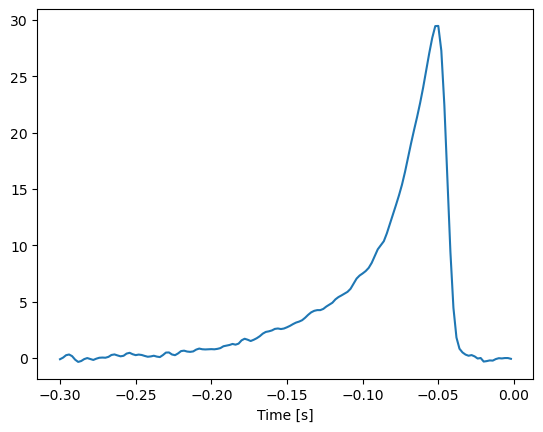

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
import scipy.io

mat = scipy.io.loadmat('c1p8.mat')
stim = mat['stim']
rho = mat['rho']


Fs=500  # sampling frequency
T=20*60   # duration of the recording in seconds

T_win=0.3  # duration of the time window for the spike-triggered average, in seconds
N=int(T_win*Fs)  # number of time bins in the window for the spike-triggered average

# time vector for the spike-triggered average
t=np.arange(-T_win,0,1/Fs)
fig = plt.figure()
ax = plt.axes(xlim=(0, 150), ylim=(-5, 35))
line, = ax.plot([], [], lw=2)

# vector of spike-triggered average
stim_av=np.zeros(N)

# number of spikes for computing the spike-triggered average
num_spikes=0

# just for animation
def init():
    line.set_data([], [])
    return line,

lstim = []
lspike = []

# here the spike triggered average is calculated
for i in range(N,Fs*T):
    if rho[i,0]==1:
        stim_av += stim[range(i-N+1,i+1)][:,0]
        num_spikes = num_spikes+1
        lstim.append(np.copy(stim_av/(num_spikes+1e-12)))
        lspike.append(np.copy(num_spikes))
    
# just for animation
def animate(x):
    x = x*3
    data = lstim[x]
    line.set_data(np.arange(len(data)), data)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=2000, interval=1, blit=True)

plt.close()
plt.plot(t, np.roll(lstim[-1],-10))
plt.xlabel("Time [s]")

The neuron fires…
But not all the time. It spikes preferentially when:
The stimulus rises slowly over ~200–300 ms
Then reaches a peak right before the spike
Then falls sharply

🧩 What the neuron "cares about":
It responds to specific patterns in the input
That means it is selective, likely playing a role in detecting changes or feature timing
This is a stimulus-driven neuron, unlike a Poisson spike train where firing is random



# Exercise 3
Using the data of the problem above, calculate and plot stimulus averages triggered on events consisting of pairs of spikes (which need not necessarily be adjacent) separated by a given interval. The stimulus average should be triggered by the time of the later spike. Plot these twospike- triggered average stimuli for various separation intervals ranging from 2 to 100 ms. Plot, as a function of the separation between the two spikes, the magnitude of the difference between the two-spike triggered average and the sum of two single-spike-triggered averages (as obtained above). What do you conclude?

In [10]:
# Recipe
mat = scipy.io.loadmat('c1p8.mat')
stim = mat['stim']
rho = mat['rho']


Fs=500  # sampling frequency
T=20*60   # duration of the recording in seconds

T_win=0.3  # duration of the time window for the spike-triggered average, in seconds
N=int(T_win*Fs)  # number of time bins in the window for the spike-triggered average

# time vector for the spike-triggered average
t=np.arange(-T_win,0,1/Fs)

Text(0.5, 0, 'Time (s)')

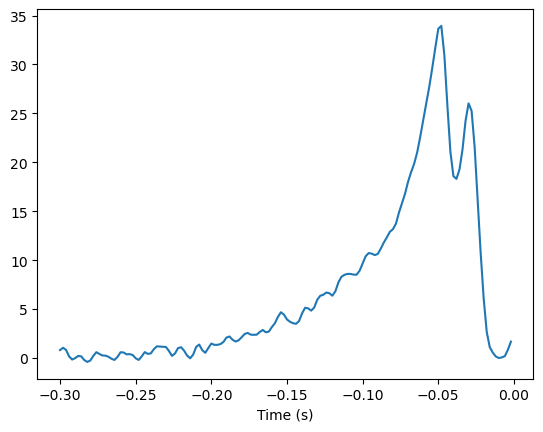

In [8]:
def spike_triggered_average():
    num_spikes=0
    stim_av=np.zeros(N)

    for i in range(N,Fs*T):
        if rho[i,0]==1:
            stim_av += stim[range(i-N+1,i+1)][:,0]
            num_spikes = num_spikes+1
    
    return stim_av/num_spikes
# function for computing the two-spike-triggered average
def two_spike_trig_av(delta_t,Fs,T,N,rho,stim):
    # number of spikes for computing the spike-triggered average
    num_spikes=0
    stim_av_two= np.zeros(N)
    for i in range(N,Fs*T):
        if rho[i-np.round(delta_t*Fs).astype(int)]==1 & rho[i]==1:
            stim_av_two = stim_av_two + stim[range(i-N+1,i+1)][:,0]
            num_spikes = num_spikes+1
    stim_av_two=stim_av_two/num_spikes
    return stim_av_two
stim_av= spike_triggered_average()


# Stimulus average triggered by two spike
delta_t = 0.02 #0.06  # temporal separation between the two spikes

# see function for computing the two-spike triggered average at the start of
# the script
stim_av_two=two_spike_trig_av(delta_t,Fs,T,N,rho,stim)

plt.plot(t,stim_av_two)
plt.xlabel('Time (s)')

This is the stimulus average before a pair of spikes that occur with a fixed short interval (e.g., 10 ms apart)
Time range: from –300 ms to 0 ms, ending at the second spike
The shape is structured, with a double-peak and a sharp drop

✅ Interpretation:
The neuron fires two closely timed spikes in response to a specific rising stimulus pattern
Suggests that both spikes are stimulus-driven, not just the second
Indicates the neuron is sensitive to dynamics over a longer period before firing a second spike

Text(0.5, 0, 'Temporal separation (s)')

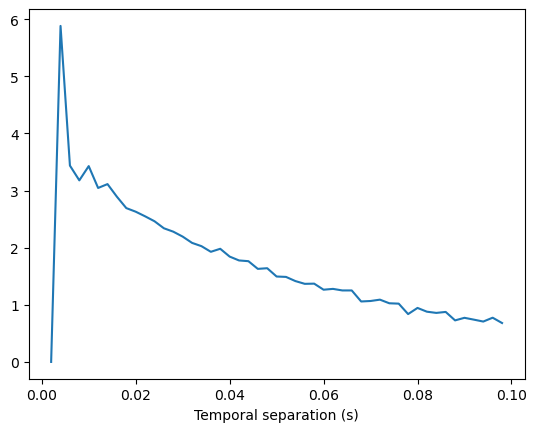

In [11]:
# Compute the distance between the two-spike triggered average and two
# single-spike triggered averages, and plot as a function of the temporal
# separation
delta_t_min=0.002  # smallest temporal separation
delta_t_max=0.1   # largest temporal separation
num_sep = int((delta_t_max - delta_t_min)*Fs)  # maximal number of temporal separations

t_sep=np.arange(delta_t_min, delta_t_max, delta_t_min)  # temporal separations that will be considered
diff_stim_av=np.zeros(num_sep) # differences in the stimulation averages

spikes = []
for i in range(1, num_sep):
    # compute two-spike triggered average
    delta_t = delta_t_min+(i-1)*delta_t_min  # temporal separation between the two spikes
    stim_av_two=two_spike_trig_av(delta_t,Fs,T,N,rho,stim)
    spikes.append(np.copy(stim_av_two))
    
    # shift single-spike triggered average and compute difference
    stim_av_shifted = np.roll(stim_av,-round(delta_t*Fs))
    diff_stim_av[i]=np.mean(abs(stim_av_two-stim_av-stim_av_shifted))

plt.plot(t_sep,diff_stim_av)
plt.xlabel('Temporal separation (s)')

# Conclusion: The difference declines with increasing temporal separation,
# and declines fastes for small temporal separations.

Y-axis: Difference (error) between:
The actual two-spike STA
The sum of two single-spike STAs (shifted)

X-axis: Temporal separation between spikes in the pair (0 to 100 ms)

✅ Interpretation:
Large error at small separations → neuron behaves nonlinearly when spikes are close together
Smaller error at large separations → neuron becomes more linear, i.e., you can sum the responses of individual spikes

🧠 This confirms:
The neuron's response to a spike pair is not simply the sum of two single spikes when those spikes are close in time.

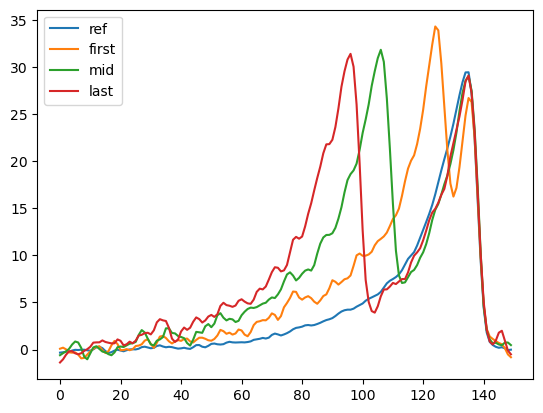

In [12]:
fig = plt.figure()
plt.plot(stim_av, label="ref")
plt.plot(spikes[10], label="first")
plt.plot(spikes[-20], label="mid")
plt.plot(spikes[-10], label="last")
plt.legend()

Multiple STAs:
ref: STA aligned to second spike (blue)
first, mid, last: STAs with one component shifted earlier by increasing amounts

✅ Interpretation:
As you shift the first STA back in time and add it to the second:
You see a better match to the true two-spike STA

But for short intervals, the match is still off — confirming nonlinear effects

The curve shapes don’t just add linearly, especially for close spike pairs


# SUMMARY

Q1 – Poisson Simulation	Validates the random, memoryless nature of Poisson spiking

Q2 – STA	Spikes are stimulus-dependent; neuron encodes specific temporal features

Q3 – Spike Pair Analysis	Spikes are not independent at short intervals; neuron exhibits nonlinear temporal integration